In [2]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, DBSCAN, AgglomerativeClustering, estimate_bandwidth
import seaborn as sns; sns.set()
import numpy as np
from itertools import cycle
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import ecopy as ep
from sklearn import metrics

In [51]:
df = pd.read_csv("temp_data.csv", sep=";")
x = df.iloc[1:, 1:].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf['names'] = df.track_name

nmds_df = df.iloc[1:, 1:].values**2
nmds_df_T = ep.transform(dunes, 'wisconsin')
nmds_df_D = ep.distance(nmds_df_T, 'bray')
musicMDS = ep.MDS(nmds_df_D)
names = df['track_name'].values
massive = dunesMDS.scores

colors = cycle('bgrcmy')

c:\users\николай\appdata\local\programs\python\python37-32\lib\site-packages\ecopy\ordination\pcoa.py:138: RuntimeWarning: invalid value encountered in sqrt
  self.U = np.round(self.U.dot(np.diag(np.sqrt(self.evals))), 4)


Finished at iteration 2. Stress = 0.25585132299193775
Finished at iteration 34. Stress = 0.2564942168281604
Finished at iteration 38. Stress = 0.24764100670493833
Finished at iteration 64. Stress = 0.24852291437675658
Finished at iteration 28. Stress = 0.2628143419997914
Finished at iteration 9. Stress = 0.4102810742479939
Finished at iteration 9. Stress = 0.41025316452276406
Finished at iteration 43. Stress = 0.235135868972003
Finished at iteration 76. Stress = 0.24113871524817868
Finished at iteration 35. Stress = 0.34985111605965474
Finished at iteration 38. Stress = 0.2692726740876993
Finished at iteration 63. Stress = 0.2193678495137757
Finished at iteration 50. Stress = 0.2337630305954483
Finished at iteration 30. Stress = 0.28482370106262983
Finished at iteration 35. Stress = 0.26349984862389386
Finished at iteration 87. Stress = 0.24913204404330136
Finished at iteration 25. Stress = 0.267617755299842
Finished at iteration 65. Stress = 0.2263274788340055
Finished at iteration 10

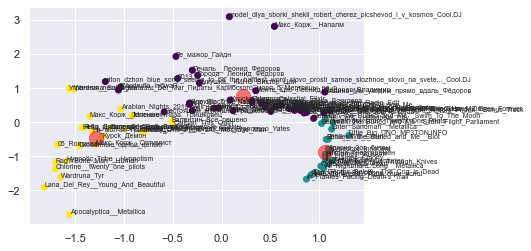

In [59]:
### K-MEANS

kmeans = KMeans(n_clusters = 3).fit(massive)
y_kmeans = kmeans.labels_
plt.scatter(massive[:, 0], massive[:, 1], c=y_kmeans, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

for i in enumerate(names):
    plt.text(massive[i[0] - 1][0], massive[i[0] - 1][1], names[i[0]], size="xx-small")

Text(0.5, 1.0, 'Estimated number of clusters: 8')

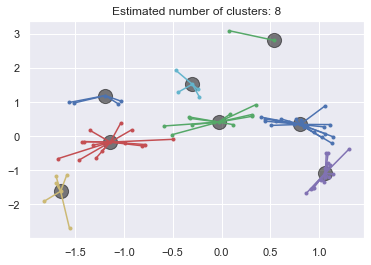

In [60]:
### AFFINITY POROP

af = AffinityPropagation().fit(massive)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = massive[cluster_centers_indices[k]]
    plt.plot(massive[class_members, 0], massive[class_members, 1], col + '.')
    plt.scatter(cluster_center[0], cluster_center[1], c='black', s=200, alpha=0.5)
    for i in massive[class_members]:
        plt.plot([cluster_center[0], i[0]], [cluster_center[1], i[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)

Text(0.5, 1.0, 'Estimated number of clusters: 2')

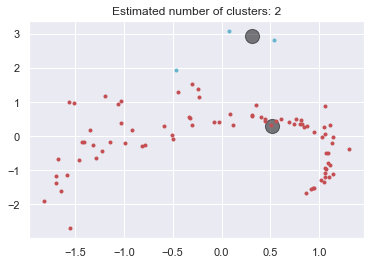

In [61]:
### MEANSHIFT

ms = MeanShift().fit(massive)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(massive[class_members, 0], massive[class_members, 1], col + '.')
    plt.scatter(cluster_center[0], cluster_center[1], c='black', s=200, alpha=0.5)

plt.title('Estimated number of clusters: %d' % n_clusters_)

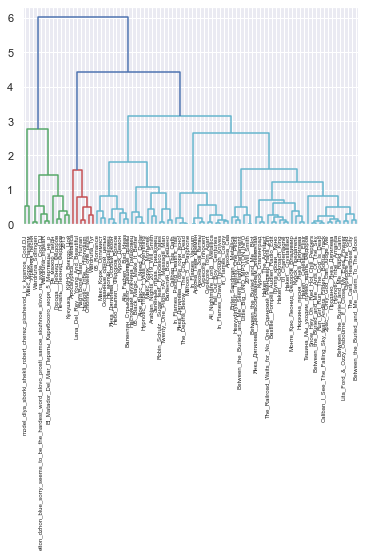

In [62]:
### HIERARCHY

mergings = linkage(massive, method='complete')
dendrogram(mergings, labels=names)
plt.show()

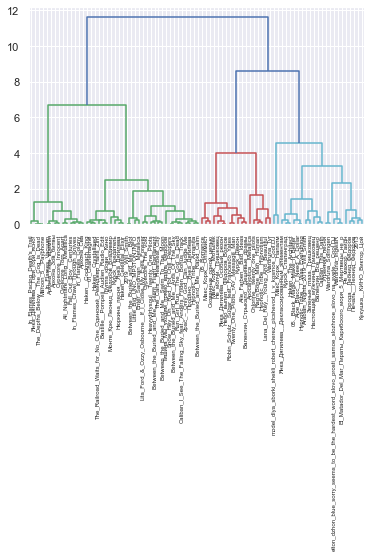

In [63]:
mergings = linkage(massive, method='ward')
dendrogram(mergings, labels=names)
plt.show()

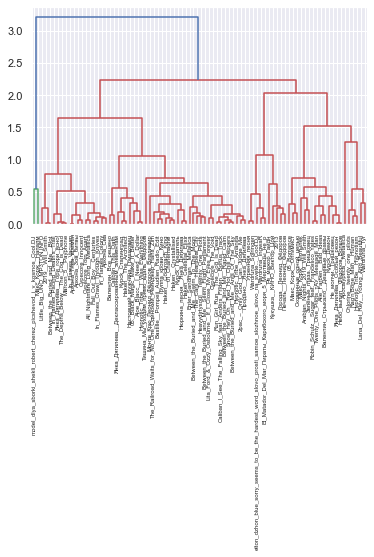

In [64]:
mergings = linkage(massive, method='average')
dendrogram(mergings, labels=names)
plt.show()

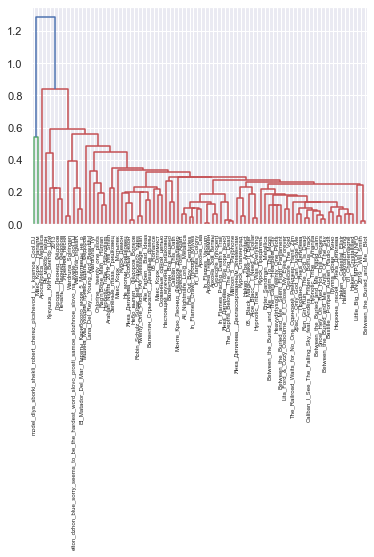

In [65]:
mergings = linkage(massive, method='single')
dendrogram(mergings, labels=names)
plt.show()

Text(0.5, 1.0, 'Estimated number of clusters: 3')

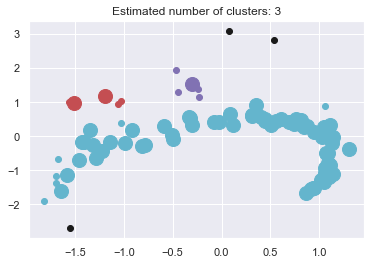

In [67]:
### DBSCAN

db = DBSCAN().fit(massive)
labels = db.labels_
samples = np.zeros_like(labels, dtype=bool)
samples[db.core_sample_indices_] = True

unique_labels = set(labels)
n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_members = labels == k

    xy = massive[class_members & samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', color=col, markersize=14)

    xy = massive[class_members & ~samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', color=col, markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)

In [68]:
with open('principle.csv', encoding='utf-8') as f:
    numbers = []
    for lines in f:
        numbers.append(lines.split()[-1])
numbers.remove(numbers[0])
target = [int(i) for i in numbers]

x, y = massive, target

algorithms = []
algorithms.append(KMeans(n_clusters = 3))
algorithms.append(AffinityPropagation())
algorithms.append(DBSCAN())
algorithms.append(MeanShift())
algorithms.append(AgglomerativeClustering())

data = []
for algo in algorithms:
    algo.fit(x)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(x, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure',
                                           'Silhouette'],
                       index=['K-means', 'Affinity',
                              'DBSCAN', 'MeanShift', 'Agglomerative'])
print(results)

                    ARI       AMI  Homogenity  Completeness  V-measure  \
K-means        0.015187 -0.006112    0.091503      0.195258   0.124611   
Affinity       0.009194  0.000507    0.236660      0.288739   0.260118   
DBSCAN        -0.000218 -0.026657    0.067551      0.258596   0.107119   
MeanShift     -0.003385 -0.008228    0.019009      0.281961   0.035617   
Agglomerative -0.000790 -0.006897    0.046196      0.152379   0.070898   

               Silhouette  
K-means          0.463065  
Affinity         0.522682  
DBSCAN           0.130360  
MeanShift        0.403425  
Agglomerative    0.419771  


In [32]:
data = []
for i in range(2, 15):
    km = KMeans(n_clusters = i).fit(massive)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, km.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, km.labels_),
        'Homogenity': metrics.homogeneity_score(y, km.labels_),
        'Completeness': metrics.completeness_score(y, km.labels_),
        'V-measure': metrics.v_measure_score(y, km.labels_),
        'Silhouette': metrics.silhouette_score(x, km.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure',
                                           'Silhouette'],
                       index=list(range(2, 15)))
print(results)

         ARI       AMI  Homogenity  Completeness  V-measure  Silhouette
2  -0.000934 -0.007513    0.045783      0.151512   0.070318    0.425364
3   0.015187 -0.006112    0.091503      0.195258   0.124611    0.463065
4   0.017586 -0.050652    0.102393      0.172018   0.128372    0.500754
5   0.024090 -0.007068    0.157770      0.242356   0.191122    0.516733
6   0.029200 -0.033366    0.159326      0.230450   0.188399    0.532126
7   0.004160 -0.011118    0.208549      0.265904   0.233759    0.500444
8   0.007948 -0.008609    0.232170      0.281387   0.254420    0.522830
9  -0.011770 -0.042314    0.240426      0.266977   0.253007    0.506873
10  0.027145  0.002301    0.295889      0.310456   0.302997    0.477073
11  0.017872  0.020338    0.317745      0.329476   0.323504    0.475505
12  0.032577  0.008011    0.330913      0.328599   0.329752    0.454668
13  0.004114 -0.004673    0.351737      0.328793   0.339878    0.445491
14 -0.003133 -0.017289    0.363652      0.328248   0.345044    0

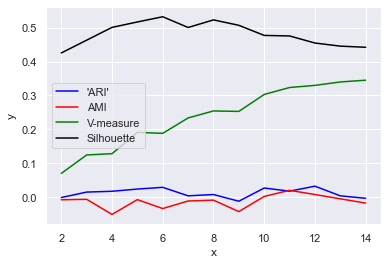

In [39]:
fig, ax = plt.subplots()                        
ax.plot(list(range(2, 15)), results['ARI'].values, color="blue", label="'ARI'")      
ax.plot(list(range(2, 15)), results['AMI'].values, color="red", label="AMI")      
ax.plot(list(range(2, 15)), results['V-measure'].values, color="green", label="V-measure")  
ax.plot(list(range(2, 15)), results['Silhouette'].values, color="black", label="Silhouette")     
ax.set_xlabel("x")                              
ax.set_ylabel("y")                              
ax.legend()                                     

plt.show()    

In [57]:
data = []
for i in range(-25, -125, -10):
    km = AffinityPropagation(preference = i).fit(massive)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, km.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, km.labels_),
        'Homogenity': metrics.homogeneity_score(y, km.labels_),
        'Completeness': metrics.completeness_score(y, km.labels_),
        'V-measure': metrics.v_measure_score(y, km.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure',
                                           'Silhouette'],
                       index=list(range(-25, -125, -10)))
print(results)

           ARI           AMI    Homogenity  Completeness     V-measure  \
-25   0.018072 -3.047890e-02  7.461333e-02      0.163827  1.025303e-01   
-35  -0.006159 -3.375826e-02  7.451362e-02      0.156938  1.010495e-01   
-45  -0.006159 -3.375826e-02  7.451362e-02      0.156938  1.010495e-01   
-55  -0.003844 -3.374494e-02  7.403825e-02      0.157736  1.007748e-01   
-65  -0.006415 -1.036500e-02  4.411595e-02      0.145458  6.769938e-02   
-75  -0.005900 -1.019145e-02  4.419964e-02      0.145973  6.785365e-02   
-85   0.000000 -3.435179e-16 -6.072286e-17      1.000000 -1.214457e-16   
-95   0.000000 -3.435179e-16 -6.072286e-17      1.000000 -1.214457e-16   
-105  0.000000 -3.435179e-16 -6.072286e-17      1.000000 -1.214457e-16   
-115  0.000000 -3.435179e-16 -6.072286e-17      1.000000 -1.214457e-16   

      Silhouette  
-25          NaN  
-35          NaN  
-45          NaN  
-55          NaN  
-65          NaN  
-75          NaN  
-85          NaN  
-95          NaN  
-105         N

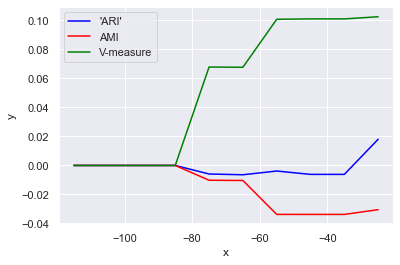

In [58]:
fig, ax = plt.subplots()                        
ax.plot(list(range(-25, -125, -10)), results['ARI'].values, color="blue", label="'ARI'")      
ax.plot(list(range(-25, -125, -10)), results['AMI'].values, color="red", label="AMI")      
ax.plot(list(range(-25, -125, -10)), results['V-measure'].values, color="green", label="V-measure")  
#ax.plot(list(range(2, 15)), results['Silhouette'].values, color="black", label="Silhouette")     
ax.set_xlabel("x")                              
ax.set_ylabel("y")                              
ax.legend()                                     

plt.show()    

In [40]:
data = []
for i in np.arange(0.1, 1, 0.1):
    km = DBSCAN(eps = i).fit(massive)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, km.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, km.labels_),
        'Homogenity': metrics.homogeneity_score(y, km.labels_),
        'Completeness': metrics.completeness_score(y, km.labels_),
        'V-measure': metrics.v_measure_score(y, km.labels_),
        'Silhouette': metrics.silhouette_score(x, km.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure',
                                           'Silhouette'],
                       index=list(np.arange(0.1, 1, 0.1)))
print(results)

          ARI       AMI  Homogenity  Completeness  V-measure  Silhouette
0.1  0.001442  0.001502    0.032583      0.289393   0.058571   -0.137568
0.2 -0.013392  0.014665    0.129418      0.253274   0.171304    0.183833
0.3  0.024496 -0.012474    0.073598      0.193318   0.106609    0.211510
0.4  0.006058  0.000011    0.046492      0.193584   0.074977    0.292793
0.5 -0.000218 -0.026657    0.067551      0.258596   0.107119    0.130360
0.6 -0.003385 -0.008228    0.019009      0.281961   0.035617    0.462336
0.7 -0.003385 -0.008228    0.019009      0.281961   0.035617    0.462336
0.8 -0.003385 -0.008228    0.019009      0.281961   0.035617    0.462336
0.9 -0.000626 -0.010590    0.013414      0.272460   0.025569    0.457217


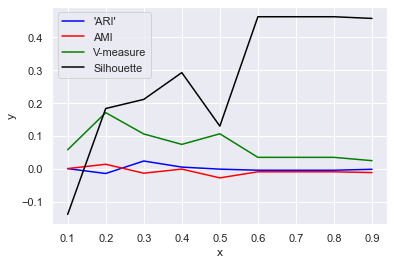

In [44]:
fig, ax = plt.subplots()                        
ax.plot(list(np.arange(0.1, 1, 0.1)), results['ARI'].values, color="blue", label="'ARI'")      
ax.plot(list(np.arange(0.1, 1, 0.1)), results['AMI'].values, color="red", label="AMI")      
ax.plot(list(np.arange(0.1, 1, 0.1)), results['V-measure'].values, color="green", label="V-measure")  
ax.plot(list(np.arange(0.1, 1, 0.1)), results['Silhouette'].values, color="black", label="Silhouette")     
ax.set_xlabel("x")                              
ax.set_ylabel("y")                              
ax.legend()                                     

plt.show()    

In [46]:
data = []
for i in ['ward', 'complete', 'average', 'single']:
    km = AgglomerativeClustering(linkage = i).fit(massive)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, km.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, km.labels_),
        'Homogenity': metrics.homogeneity_score(y, km.labels_),
        'Completeness': metrics.completeness_score(y, km.labels_),
        'V-measure': metrics.v_measure_score(y, km.labels_),
        'Silhouette': metrics.silhouette_score(x, km.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure',
                                           'Silhouette'],
                       index=['ward', 'complete', 'average', 'single'])
print(results)

               ARI       AMI  Homogenity  Completeness  V-measure  Silhouette
ward     -0.000790 -0.006897    0.046196      0.152379   0.070898    0.419771
complete  0.002269 -0.013433    0.033428      0.186283   0.056684    0.303130
average  -0.000626 -0.010590    0.013414      0.272460   0.025569    0.457217
single   -0.000626 -0.010590    0.013414      0.272460   0.025569    0.457217


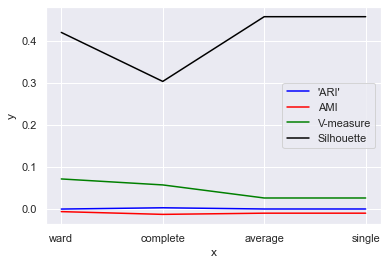

In [48]:
fig, ax = plt.subplots()                        
ax.plot(['ward', 'complete', 'average', 'single'], results['ARI'].values, color="blue", label="'ARI'")      
ax.plot(['ward', 'complete', 'average', 'single'], results['AMI'].values, color="red", label="AMI")      
ax.plot(['ward', 'complete', 'average', 'single'], results['V-measure'].values, color="green", label="V-measure")  
ax.plot(['ward', 'complete', 'average', 'single'], results['Silhouette'].values, color="black", label="Silhouette")     
ax.set_xlabel("x")                              
ax.set_ylabel("y")                              
ax.legend()                                     

plt.show()    

In [66]:
data = []
for i in [False, True]:
    km = MeanShift(bin_seeding=i).fit(massive)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, km.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, km.labels_),
        'Homogenity': metrics.homogeneity_score(y, km.labels_),
        'Completeness': metrics.completeness_score(y, km.labels_),
        'V-measure': metrics.v_measure_score(y, km.labels_),
        'Silhouette': metrics.silhouette_score(x, km.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure',
                                           'Silhouette'],
                       index=['false', 'true'])
print(results)

            ARI       AMI  Homogenity  Completeness  V-measure  Silhouette
false  0.037478  0.026763    0.065097      0.230854   0.101556    0.427336
true   0.037478  0.026763    0.065097      0.230854   0.101556    0.427336
